In [1]:
import sys
sys.path.append('../')
import numpy as np
import pandas as pd
import scipy as sp
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
from helpers.products import Products
from directed_graph_generators.directed_tree import DirectedTree
from directed_graph_generators.lattice import DirectedLattice
from directed_graph_generators.directed_stochastic_block_model import DirectedStochasticBlockModel

from clustering_algorithms.exponential_clustering import Exponential_Clustering, Exponential_Clustering_no_evecs
from clustering_algorithms.zanetti_clustering import DSBM_Clustering_Zanetti

Exponential Clustering ARI: 1.0
Zanetti Clustering ARI: 1.0


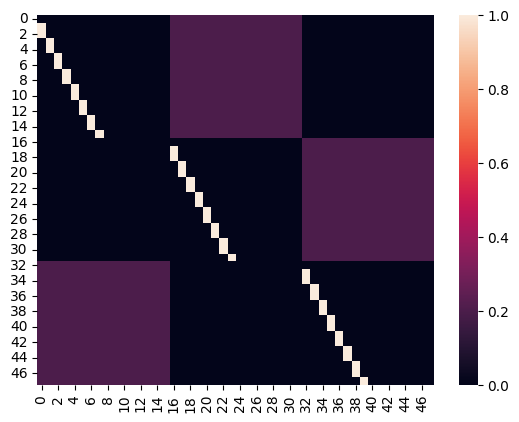

In [2]:
downwards_binary_tree = DirectedTree(16, 2).adjacency_matrix
three_cycle = np.array([[0,1,0],[0,0,1],[1,0,0]])

graph_adj = Products.tensor_product(np.eye(len(three_cycle)),downwards_binary_tree)
graph_adj+= + Products.tensor_product(three_cycle, 0.2*np.ones(shape = (len(downwards_binary_tree), len(downwards_binary_tree))))
true_clusters = np.array([len(downwards_binary_tree)*[i] for i in range(len(three_cycle))]).flatten()
sns.heatmap(graph_adj)
# trying Zanetti clustering
ec_no_evecs_clusters, cos_A = Exponential_Clustering_no_evecs(graph_adj,K=3,t=10)
ec_no_evecs_ari = adjusted_rand_score(true_clusters,ec_no_evecs_clusters)
# Zanetti Clustering
zc_clusters,_ = DSBM_Clustering_Zanetti(graph_adj,K=3,l=1,method='adjacency',normalize=True)
zc_ari = adjusted_rand_score(true_clusters,zc_clusters)
# printing results
print(f"Exponential Clustering ARI: {ec_no_evecs_ari}")
print(f"Zanetti Clustering ARI: {zc_ari}")

Adding some noise...

Exponential Clustering ARI: 1.0
Zanetti Clustering ARI: 1.0


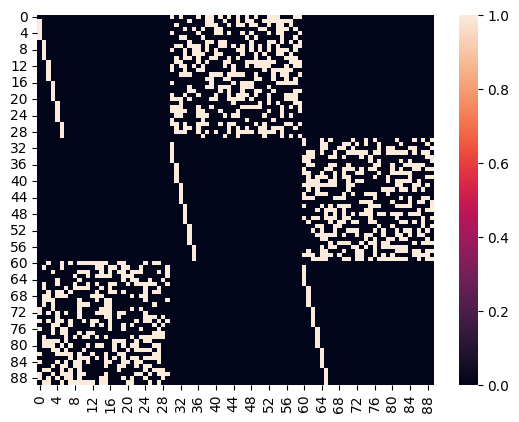

In [3]:
downwards_binary_tree = DirectedTree(30, 5).adjacency_matrix
three_cycle = np.array([[0,1,0],[0,0,1],[1,0,0]])

graph_adj = Products.tensor_product(np.eye(len(three_cycle)),downwards_binary_tree)
noisy_3_cycle = DirectedStochasticBlockModel(k=3,N = len(graph_adj), p=0.5, q=0.5,F = np.array([[0,0.8,0.2],[0.2,0,0.8],[0.8,0.2,0]])).adjacency_matrix
# replacing diagonal blocks with 0s and 
 
ones = np.ones(shape = (len(downwards_binary_tree), len(downwards_binary_tree)))
block_three_cycle_of_ones = Products.tensor_product(three_cycle,ones)

noisy_3_cycle = noisy_3_cycle * block_three_cycle_of_ones
graph_adj_complete = graph_adj + noisy_3_cycle
true_clusters = np.array([len(downwards_binary_tree)*[i] for i in range(len(three_cycle))]).flatten()
sns.heatmap(graph_adj_complete)
# trying Zanetti clustering
ec_no_evecs_clusters, cos_A = Exponential_Clustering_no_evecs(graph_adj_complete,K=3,t=10)
ec_no_evecs_ari = adjusted_rand_score(true_clusters,ec_no_evecs_clusters)
# Zanetti Clustering
zc_clusters,_ = DSBM_Clustering_Zanetti(graph_adj_complete,K=3,l=1,method='adjacency',normalize=True)
zc_ari = adjusted_rand_score(true_clusters,zc_clusters)
# printing results
print(f"Exponential Clustering ARI: {ec_no_evecs_ari}")
print(f"Zanetti Clustering ARI: {zc_ari}")

It appears a tree doesn't have enough 'flow' inside them to create an adversarial example.

## Lattice Clusters

Exponential Clustering ARI: 1.0
Zanetti Clustering ARI: 1.0


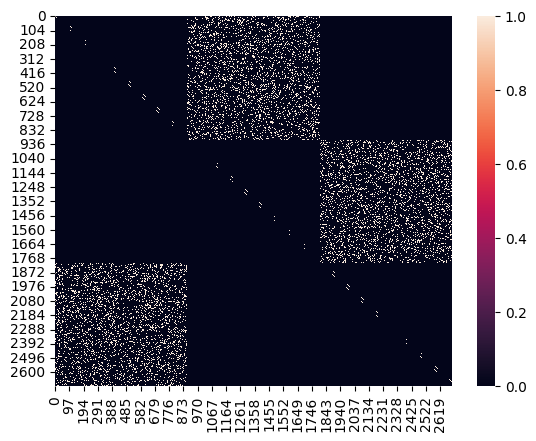

In [4]:
lattice = DirectedLattice(30, 30).adjacency_matrix
three_cycle = np.array([[0,1,0],[0,0,1],[1,0,0]])

graph_adj = Products.tensor_product(np.eye(len(three_cycle)),lattice)
noisy_3_cycle = DirectedStochasticBlockModel(k=3,N = len(graph_adj), p=0.2, q=0.2,F = np.array([[0.5,0.8,0.2],[0.2,0.5,0.8],[0.8,0.2,0.5]])).adjacency_matrix
# replacing diagonal blocks with 0s and 
 
ones = np.ones(shape = (len(lattice), len(lattice)))
block_three_cycle_of_ones = Products.tensor_product(three_cycle,ones)

noisy_3_cycle = noisy_3_cycle * block_three_cycle_of_ones
graph_adj_complete = graph_adj + noisy_3_cycle
true_clusters = np.array([len(lattice)*[i] for i in range(len(three_cycle))]).flatten()
sns.heatmap(graph_adj_complete)
# trying Zanetti clustering
ec_no_evecs_clusters, cos_A = Exponential_Clustering_no_evecs(graph_adj_complete,K=3,t=10)
ec_no_evecs_ari = adjusted_rand_score(true_clusters,ec_no_evecs_clusters)
# Zanetti Clustering
zc_clusters,_ = DSBM_Clustering_Zanetti(graph_adj_complete,K=3,l=1,method='adjacency',normalize=True)
zc_ari = adjusted_rand_score(true_clusters,zc_clusters)
# printing results
print(f"Exponential Clustering ARI: {ec_no_evecs_ari}")
print(f"Zanetti Clustering ARI: {zc_ari}")

<AxesSubplot: >

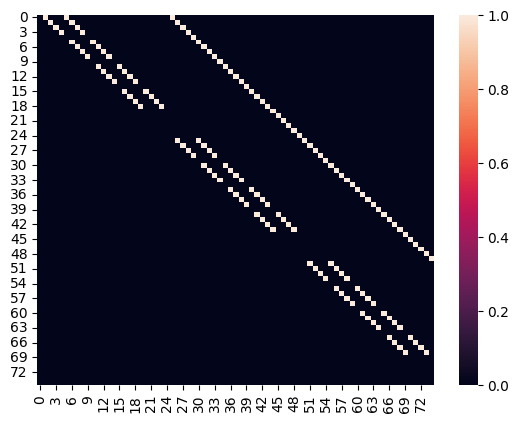

In [5]:
L = DirectedLattice(5,5).adjacency_matrix
path = np.array([[0,1,0],[0,0,1],[0,0,0]])
cart_prod_L_and_path = Products.cartesian_product(path,L)
sns.heatmap(cart_prod_L_and_path)

In [6]:
# get true clusters of cartesian_prod_L_and_path
true_clusters = [i for i in range(len(path)) for j in range(len(L))]
ARIs = []
for t in range(0,200):
    ec_no_evecs_clusters, cos_A = Exponential_Clustering_no_evecs(cart_prod_L_and_path,K=3,t=t)
    ec_no_evecs_ari = adjusted_rand_score(true_clusters,ec_no_evecs_clusters)
    ARIs.append(ec_no_evecs_ari)
    # Zanetti Clustering
    

/home/georg/.local/lib/python3.10/site-packages/numpy/core/_methods.py:49: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
/home/georg/.local/lib/python3.10/site-packages/numpy/core/fromnumeric.py:57: RuntimeWarning: overflow encountered in accumulate
  return bound(*args, **kwds)
/home/georg/.local/lib/python3.10/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/home/georg/.local/lib/python3.10/site-packages/numpy/core/_methods.py:239: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/home/georg/.local/lib/python3.10/site-packages/numpy/core/_methods.py:250: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(x, axis, dtype, out, keepdims=keepdims, where=where)
/home/georg/.local/lib/python3.10/site-packages/numpy/core/_methods.py:49: RuntimeWarning: overflow encountered in reduce
 

<AxesSubplot: >

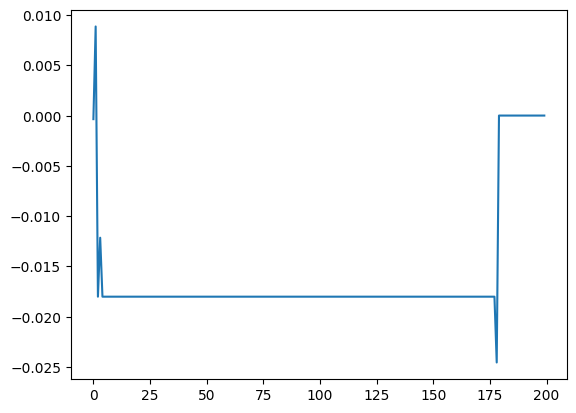

In [7]:
pd.Series(ARIs).plot()

In [8]:
zc_clusters,_ = DSBM_Clustering_Zanetti(cart_prod_L_and_path,K=3,l=1,method='adjacency',normalize=True)
zc_ari = adjusted_rand_score(true_clusters,zc_clusters)
# printing results
print(f"Exponential Clustering ARI: {ec_no_evecs_ari}")
print(f"Zanetti Clustering ARI: {zc_ari}")

Exponential Clustering ARI: 0.0
Zanetti Clustering ARI: -0.0003557452863749555


Reattempting experiment with random lattice

<AxesSubplot: >

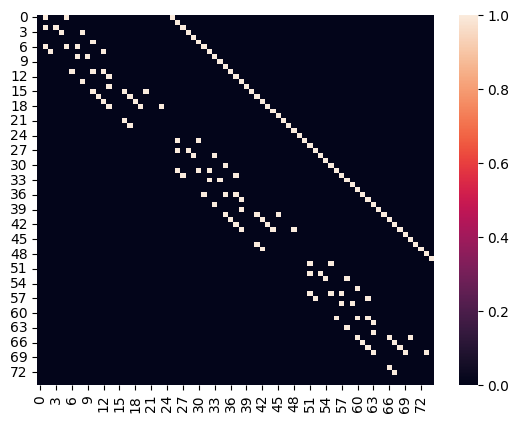

In [9]:
L = DirectedLattice(5,5,directions='random').adjacency_matrix
path = np.array([[0,1,0],[0,0,1],[0,0,0]])
cart_prod_L_and_path = Products.cartesian_product(path,L)
sns.heatmap(cart_prod_L_and_path)

In [10]:
true_clusters = [i for i in range(len(path)) for j in range(len(L))]

In [11]:
zc_clusters,_ = DSBM_Clustering_Zanetti(cart_prod_L_and_path,K=3,l=1,method='adjacency',normalize=True)
zc_ari = adjusted_rand_score(true_clusters,zc_clusters)
# printing results for standard clustering
print(f"Zanetti Clustering ARI: {zc_ari}")

Zanetti Clustering ARI: -0.0003557452863749555


In [12]:
# get true clusters of cartesian_prod_L_and_path
true_clusters = [i for i in range(len(path)) for j in range(len(L))]
ARIs = []
for t in range(0,200):
    ec_no_evecs_clusters, cos_A = Exponential_Clustering_no_evecs(cart_prod_L_and_path,K=3,t=t)
    ec_no_evecs_ari = adjusted_rand_score(true_clusters,ec_no_evecs_clusters)
    ARIs.append(ec_no_evecs_ari)
    

/home/georg/.local/lib/python3.10/site-packages/numpy/core/_methods.py:49: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
/home/georg/.local/lib/python3.10/site-packages/numpy/core/fromnumeric.py:57: RuntimeWarning: overflow encountered in accumulate
  return bound(*args, **kwds)
/home/georg/.local/lib/python3.10/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/home/georg/.local/lib/python3.10/site-packages/numpy/core/_methods.py:239: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/home/georg/.local/lib/python3.10/site-packages/numpy/core/_methods.py:250: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(x, axis, dtype, out, keepdims=keepdims, where=where)
/home/georg/.local/lib/python3.10/site-packages/sklearn/utils/extmath.py:189: RuntimeWarning: overflow encountered in matmu

<AxesSubplot: >

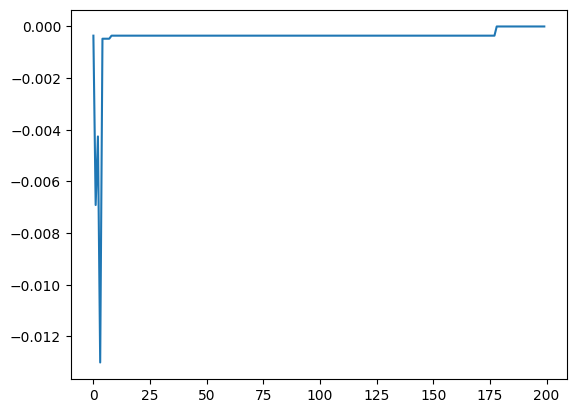

In [13]:
pd.Series(ARIs).plot()

In [14]:
from scipy.spatial.distance import squareform, pdist
# We know generate a directed graph from 2d cartesian coordinates where the the closer the points are the more likely they are to be connected and where edges are more likely to be directed into the negative y direction
# We then use the exponential clustering algorithm to cluster the graph
# We then use the Zanetti clustering algorithm to cluster the graph
# We then compare the results of the two algorithms
def generate_graph(coordinates: np.ndarray, sigma: float = 1) -> np.ndarray:
    """
    Generates a graph from a set of coordinates where the closer the points are the more likely they are to be connected
    :param coordinates: np.ndarray of shape (n,2) where n is the number of points
    :param sigma: float, the standard deviation of the gaussian distribution used to generate the graph
    :param directed: bool, whether the graph is directed or not
    :return: np.ndarray of shape (n,n) where n is the number of points
    """
    # get the euclidean distance between every pair of points
    dist = squareform(pdist(coordinates))
    # generate a graph from the distance matrix
    graph = np.exp(-dist ** 2 / (2 * sigma ** 2))
    # set the diagonal to 0
    graph = graph - np.diag(np.diag(graph))
    # make edges more likely to be directed downwards in the y direction
    for i in range(len(graph)):
        for j in range(i,len(graph)):
            # take down product of vector between coordinates and the vector (0,-1)
            p = np.dot(coordinates[i]-coordinates[j],np.array([0,-1]))
            # if the product is negative then the edge is more likely to be directed downwards
            if p > 0:
                # set graph[j,i] to 0 with probability p
                if np.random.rand() < p:
                    graph[j,i] = 0
                else:
                    graph[i,j] = 0
            if p < 0:
                # set graph[i,j] to 0 with probability p
                if np.random.rand() < np.abs(p):
                    graph[i,j] = 0
                else:
                    graph[j,i] = 0
    return graph
    
    

In [15]:
# generate coordinates of two clusters. One a gaussian cluster and the other a ring around this cluster
n = 300
gaussian_cluster = np.random.multivariate_normal(mean=[0,0],cov=[[1,0],[0,1]],size=n)
# making ring around cluster
theta = np.linspace(0,2*np.pi,n)
ring_cluster = np.array([3.5*np.cos(theta),3.5*np.sin(theta)]).T

# concatenate the two clusters
coordinates = np.concatenate([gaussian_cluster,ring_cluster])
# generate the graph

<AxesSubplot: >

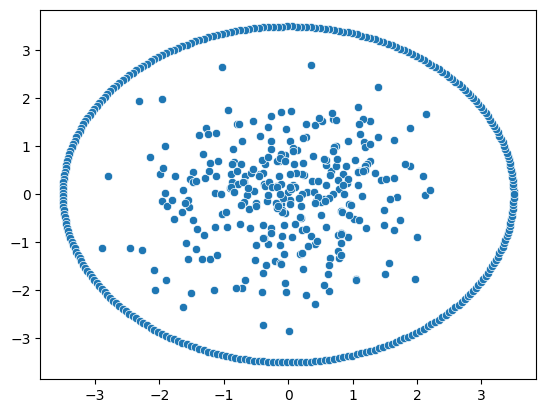

In [16]:
sns.scatterplot(x=coordinates[:,0],y=coordinates[:,1])

<AxesSubplot: >

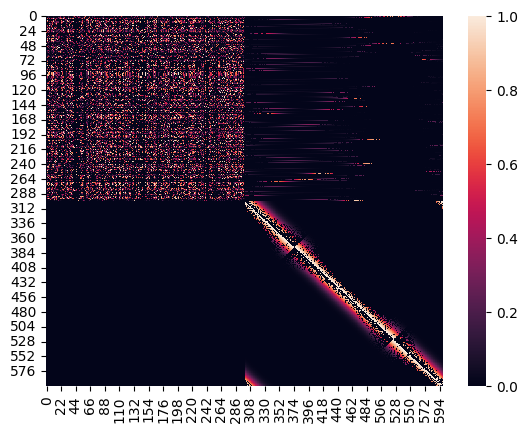

In [17]:
A = generate_graph(coordinates,sigma=1)
# set lower left block of A to 0
A[n:,:n] = 0
sns.heatmap(A)

In [18]:
#standard clustering
true_clusters = [0 for i in range(n)] + [1 for i in range(n)]
zc_clusters,_ = DSBM_Clustering_Zanetti(A,K=2,l=1,method='adjacency',normalize=True)
zc_ari = adjusted_rand_score(true_clusters,zc_clusters)
# printing results for standard clustering
print(f"Zanetti Clustering ARI: {zc_ari}")

Zanetti Clustering ARI: 0.008416523818317086


<AxesSubplot: >

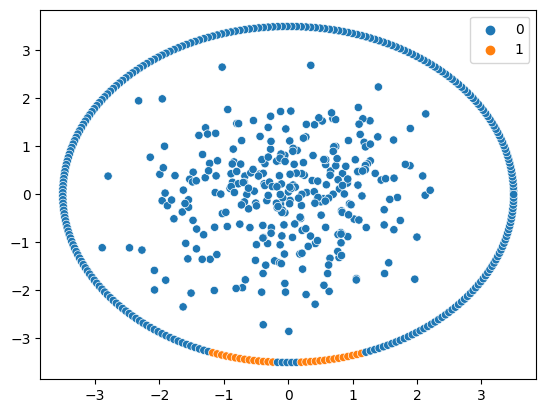

In [19]:
#lets colour the graph by the clusters given by the standard clustering
sns.scatterplot(x=coordinates[:,0],y=coordinates[:,1],hue=zc_clusters)

In [20]:
# using zanetti and exponential clustering on the graph
true_clusters = [0 for i in range(n)] + [1 for i in range(n)]
ARIs = []
for t in range(0,20):
    ec_no_evecs_clusters, cos_A = Exponential_Clustering_no_evecs(A,K=2,t=t)
    ec_no_evecs_ari = adjusted_rand_score(true_clusters,ec_no_evecs_clusters)
    ARIs.append(ec_no_evecs_ari)


<AxesSubplot: >

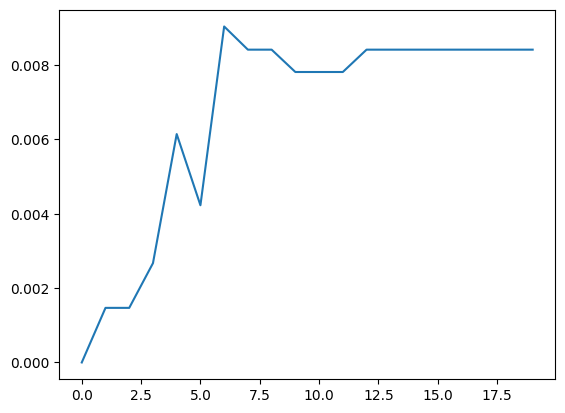

In [21]:
pd.Series(ARIs).plot()

<AxesSubplot: >

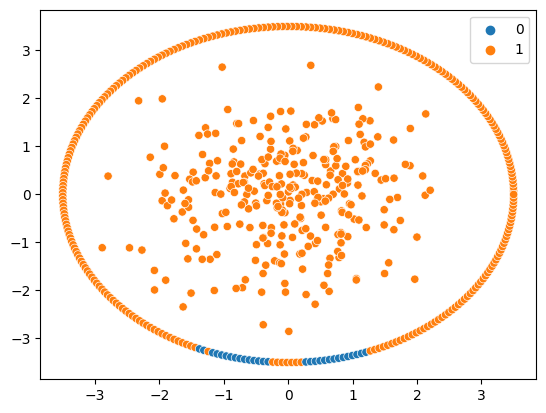

In [22]:
#lets colour the graph by the clusters given by the exponential clustering using max t
t = pd.Series(ARIs).idxmax()
ec_no_evecs_clusters, cos_A = Exponential_Clustering_no_evecs(A,K=2,t=t)
sns.scatterplot(x=coordinates[:,0],y=coordinates[:,1],hue=ec_no_evecs_clusters)

<AxesSubplot: >

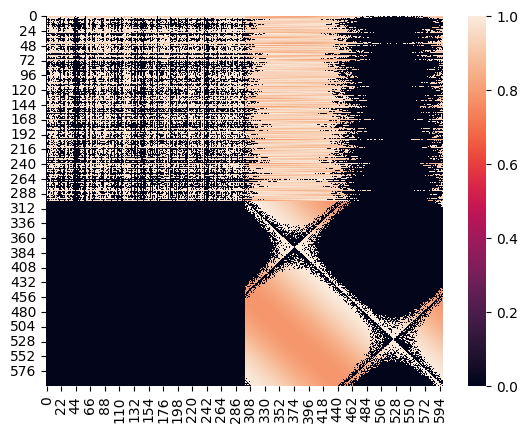

In [23]:
# Repeating teh experiment but with a different sigma
A = generate_graph(coordinates,sigma=10)
# set lower left block of A to 0
A[n:,:n] = 0
sns.heatmap(A)

Zanetti Clustering ARI: 0.18365176402449088


<AxesSubplot: >

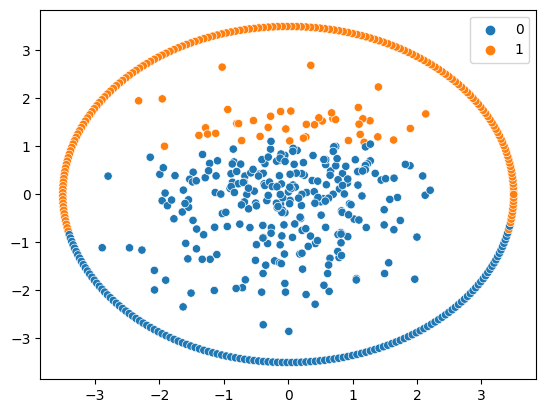

In [24]:
#standard clustering
true_clusters = [0 for i in range(n)] + [1 for i in range(n)]
zc_clusters,_ = DSBM_Clustering_Zanetti(A,K=2,l=1,method='adjacency',normalize=True)
zc_ari = adjusted_rand_score(true_clusters,zc_clusters)
# printing results for standard clustering
print(f"Zanetti Clustering ARI: {zc_ari}")

#lets colour the graph by the clusters given by the standard clustering
sns.scatterplot(x=coordinates[:,0],y=coordinates[:,1],hue=zc_clusters)

In [25]:
# using zanetti and exponential clustering on the graph
true_clusters = [0 for i in range(n)] + [1 for i in range(n)]
ARIs = []
for t in range(0,20):
    ec_no_evecs_clusters, cos_A = Exponential_Clustering_no_evecs(A,K=2,t=t)
    ec_no_evecs_ari = adjusted_rand_score(true_clusters,ec_no_evecs_clusters)
    ARIs.append(ec_no_evecs_ari)

<AxesSubplot: >

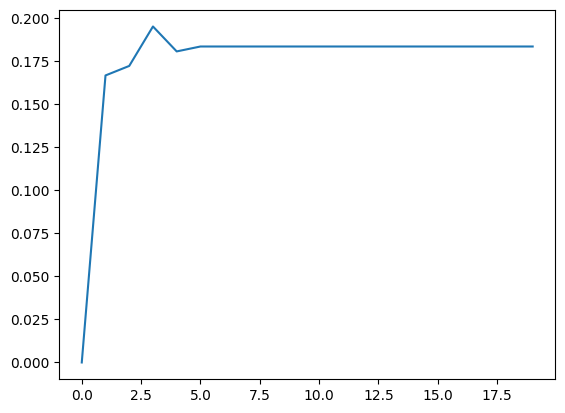

In [26]:
# plotting the ARI for different values of t
pd.Series(ARIs).plot()

In [27]:
# searching for best t based on integer values of t from before
t = pd.Series(ARIs).idxmax()
for t in np.linspace(t-1,t+2,10):
    ec_no_evecs_clusters, cos_A = Exponential_Clustering_no_evecs(A,K=2,t=t)
    ec_no_evecs_ari = adjusted_rand_score(true_clusters,ec_no_evecs_clusters)
    print(f"ARI for t={t}: {ec_no_evecs_ari}")

ARI for t=2.0: 0.1723565350340651
ARI for t=2.3333333333333335: 0.2042868552944824
ARI for t=2.6666666666666665: 0.17510667253551088
ARI for t=3.0: 0.19528952301036923
ARI for t=3.333333333333333: 0.19827760968387348
ARI for t=3.6666666666666665: 0.17513088585041695
ARI for t=4.0: 0.18079449883688234
ARI for t=4.333333333333333: 0.18653133434134544
ARI for t=4.666666666666666: 0.18365176402449088
ARI for t=5.0: 0.18365176402449088


<AxesSubplot: >

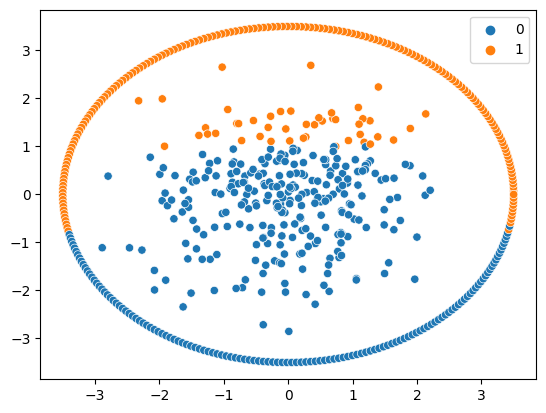

In [28]:
#lets colour the graph by the clusters given by the exponential clustering using max t
t = pd.Series(ARIs).idxmax()
ec_no_evecs_clusters, cos_A = Exponential_Clustering_no_evecs(A,K=2,t=3.66)
sns.scatterplot(x=coordinates[:,0],y=coordinates[:,1],hue=ec_no_evecs_clusters)

In [29]:
#repeating experiment with two rings of different radii
n = 300

# making ring around cluster
theta = np.linspace(0,2*np.pi,n)
ring_cluster1 = np.array([2*np.cos(theta) + 2,2*np.sin(theta)]).T
ring_cluster2 = np.array([3.5*np.cos(theta),3.5*np.sin(theta)]).T

# concatenate the two clusters
coordinates = np.concatenate([ring_cluster1,ring_cluster2])
# generate the graph
def generate_graph(coordinates, sigma=1):
    A = np.zeros((len(coordinates),len(coordinates)))
    for i in range(len(coordinates)):
        for j in range(len(coordinates)):
            if i != j:
                A[i,j] = np.exp(-np.linalg.norm(coordinates[i]-coordinates[j])**2/(2*sigma**2))
    # make internal ring more directed to external ring
    A[n:,:n] = 0
    return A

In [30]:
coordinates

array([[ 4.00000000e+00,  0.00000000e+00],
       [ 3.99955843e+00,  4.20249023e-02],
       [ 3.99823391e+00,  8.40312475e-02],
       ...,
       [ 3.49690934e+00, -1.47054683e-01],
       [ 3.49922725e+00, -7.35435789e-02],
       [ 3.50000000e+00, -8.57252759e-16]])

<AxesSubplot: >

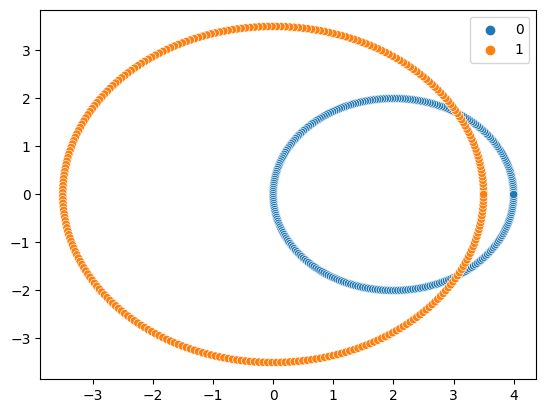

In [31]:
sns.scatterplot(x=coordinates[:,0],y=coordinates[:,1],hue=[0 for i in range(n)] + [1 for i in range(n)])

<AxesSubplot: >

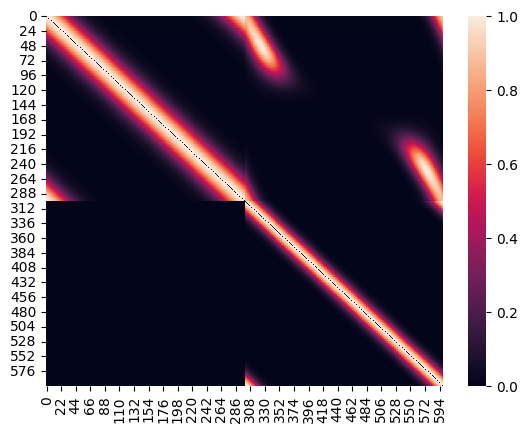

In [32]:
A = generate_graph(coordinates)
sns.heatmap(A)

In [33]:
#standard clustering
true_clusters = [0 for i in range(n)] + [1 for i in range(n)]
zc_clusters,_ = DSBM_Clustering_Zanetti(A,K=2,l=1,method='adjacency',normalize=True)
zc_ari = adjusted_rand_score(true_clusters,zc_clusters)
# printing results for standard clustering
print(f"Zanetti Clustering ARI: {zc_ari}")

Zanetti Clustering ARI: 0.22310721574630452


<AxesSubplot: >

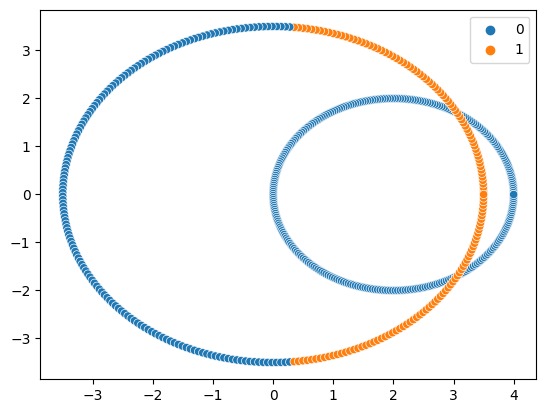

In [34]:
#lets plot these clusters
sns.scatterplot(x=coordinates[:,0],y=coordinates[:,1],hue=zc_clusters)

<AxesSubplot: >

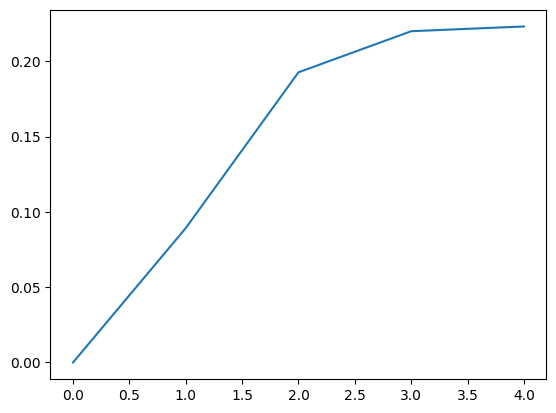

In [35]:
# using exponential clustering on the graph
true_clusters = [0 for i in range(n)] + [1 for i in range(n)]
ARIs = []
for t in range(0,5):
    ec_no_evecs_clusters, cos_A = Exponential_Clustering_no_evecs(A,K=2,t=t)
    ec_no_evecs_ari = adjusted_rand_score(true_clusters,ec_no_evecs_clusters)
    ARIs.append(ec_no_evecs_ari)
ARI_Series = pd.Series(ARIs)
ARI_Series.plot()

<AxesSubplot: >

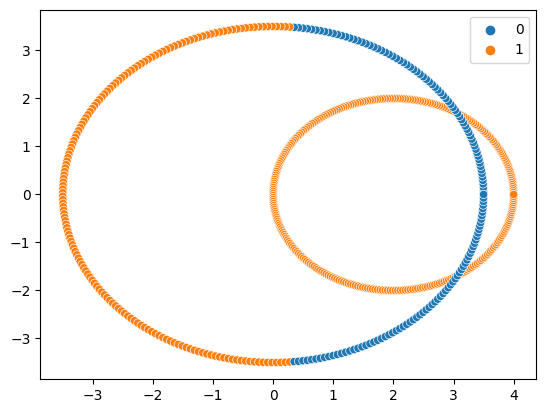

In [36]:
# plotting the ARI for best t
t = ARI_Series.idxmax()
ec_no_evecs_clusters, cos_A = Exponential_Clustering_no_evecs(A,K=2,t=t)
sns.scatterplot(x=coordinates[:,0],y=coordinates[:,1],hue=ec_no_evecs_clusters)

In [37]:
#searching for best t based on integer values of t from before
t=ARI_Series.idxmax()
new_ARIs = []
for t in np.linspace(t-1,t+2,11):
    ec_no_evecs_clusters, cos_A = Exponential_Clustering_no_evecs(A,K=2,t=t)
    ec_no_evecs_ari = adjusted_rand_score(true_clusters,ec_no_evecs_clusters)
    new_ARIs.append(ec_no_evecs_ari)
    print(f"ARI for t={t}: {ec_no_evecs_ari}")

# plotting the ARI for best t
new_ARIs_series = pd.Series(new_ARIs)



ARI for t=3.0: 0.21996356560939853
ARI for t=3.3: 0.21996356560939853
ARI for t=3.6: 0.22310721574630452
ARI for t=3.9: 0.22310721574630452
ARI for t=4.2: 0.22310721574630452
ARI for t=4.5: 0.22310721574630452
ARI for t=4.8: 0.22310721574630452
ARI for t=5.1: 0.22310721574630452
ARI for t=5.4: 0.22310721574630452
ARI for t=5.699999999999999: 0.22310721574630452
ARI for t=6.0: 0.22310721574630452


<AxesSubplot: >

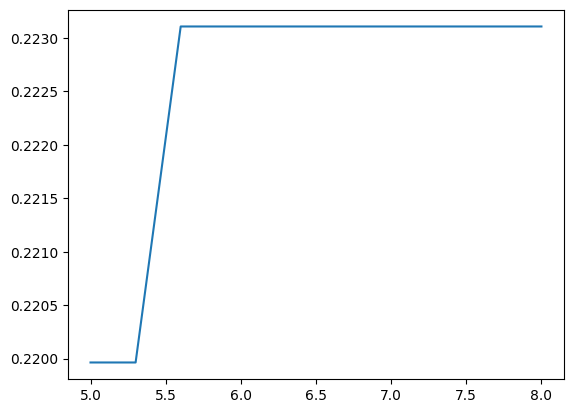

In [38]:
new_ARIs_series.index = np.linspace(t-1,t+2,11)
new_ARIs_series.plot()